In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [6]:
root_proj_dir = os.path.dirname(os.getcwd())
n_year_data_dir = os.path.join(root_proj_dir, 'n-year', 'notebooks', 'data')

rain_df = pd.read_csv(os.path.join(n_year_data_dir, 'ohare_full_precip_hourly.csv'))
rain_df['DATE'] = pd.to_datetime(rain_df['DATE'])
rain_df = rain_df.set_index(pd.DatetimeIndex(rain_df['DATE']))
print(rain_df.shape)
print(rain_df.dtypes)
rain_df.head()

(654539, 5)
STATION                 object
STATION_NAME            object
DATE            datetime64[ns]
HOURLYPrecip           float64
datetime                object
dtype: object


,STATION,STATION_NAME,DATE,HOURLYPrecip,datetime
1946-10-01 01:00:00,WBAN:94846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,1946-10-01 01:00:00,0.0,1946-10-01 01:00:00
1946-10-01 02:00:00,WBAN:94846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,1946-10-01 02:00:00,0.0,1946-10-01 02:00:00
1946-10-01 03:00:00,WBAN:94846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,1946-10-01 03:00:00,0.0,1946-10-01 03:00:00
1946-10-01 04:00:00,WBAN:94846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,1946-10-01 04:00:00,0.0,1946-10-01 04:00:00
1946-10-01 05:00:00,WBAN:94846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,1946-10-01 05:00:00,0.0,1946-10-01 05:00:00


In [48]:
cso_df = pd.read_csv('data/merged_cso_data.csv')
cso_df['Open date/time'] = pd.to_datetime(cso_df['Open date/time'])
cso_df['Gate Open Period'] = pd.to_timedelta(cso_df['Gate Open Period'], unit='m')
cso_df['Open Period Seconds'] = cso_df['Gate Open Period'].astype('timedelta64[s]')
cso_df = cso_df.set_index(pd.DatetimeIndex(cso_df['Open date/time']))
print(cso_df.shape)
print(cso_df.dtypes)
cso_df.head()

(10879, 9)
Outfall Structure               object
Outfall Location                object
Tide Gate #                     object
Waterway Reach                  object
Plant                           object
Open date/time          datetime64[ns]
Close date/time                 object
Gate Open Period       timedelta64[ns]
Open Period Seconds            float64
dtype: object


,Outfall Structure,Outfall Location,Tide Gate #,Waterway Reach,Plant,Open date/time,Close date/time,Gate Open Period,Open Period Seconds
2016-04-01 17:54:00,DS-N05,"Forest Glen Ave (S), West of Cicero",TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 17:54:00,2016-04-01 23:07:00,05:13:48,18828.0
2016-04-01 17:53:00,DS-N08,Mango Ave ext. (Leonard & Miltmore) (W),TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 17:53:00,2016-04-01 19:42:00,01:48:55,6535.0
2016-04-01 18:10:00,DS-N10B,Imlay St & Milwaukee (W),TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 18:10:00,2016-04-01 18:26:00,00:16:08,968.0
2016-04-01 17:53:00,DS-N08,Mango Ave ext. (Leonard & Miltmore) (W),TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 17:53:00,2016-04-01 19:42:00,01:48:55,6535.0
2016-04-01 17:54:00,DS-N05,"Forest Glen Ave (S), West of Cicero",TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 17:54:00,2016-04-01 23:07:00,05:13:48,18828.0


In [49]:
# Getting earliest dates to pull weather for
cso_df.sort_values(by='Open date/time').head()

,Outfall Structure,Outfall Location,Tide Gate #,Waterway Reach,Plant,Open date/time,Close date/time,Gate Open Period,Open Period Seconds
2009-08-17 06:04:00,DS-M76,DS-M76,NaN,NBCR Lower (NSC Confluence),NaN,2009-08-17 06:04:00,2009-08-17 07:11:00,01:07:00,4020.0
2009-08-17 06:37:00,DS-D27I,DS-D27I,NaN,DesPlaines Middle,NaN,2009-08-17 06:37:00,2009-08-17 10:32:00,03:55:00,14100.0
2009-08-17 06:45:00,DS-D49,DS-D49,NaN,DesPlaines Lower,NaN,2009-08-17 06:45:00,2009-08-17 07:57:00,01:12:00,4320.0
2009-08-17 06:46:00,"DS-D47,50,51","DS-D47,50,51",NaN,Salt Cr,NaN,2009-08-17 06:46:00,2009-08-17 08:29:00,01:43:00,6180.0
2009-08-17 07:24:00,DS-D26,DS-D26,NaN,DesPlaines Middle,NaN,2009-08-17 07:24:00,2009-08-17 09:49:00,02:25:00,8700.0


In [50]:
# Pulling from April of 2009 to get some additional padding before earliest CSO
cso_rain_df = rain_df['2009-04-01':]
cso_rain_df.head()

,STATION,STATION_NAME,DATE,HOURLYPrecip,datetime
2009-04-01 00:00:00,WBAN:94846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2009-04-01 00:00:00,0.0,2009-04-01 00:00:00
2009-04-01 00:51:00,WBAN:94846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2009-04-01 00:51:00,0.0,2009-04-01 00:51:00
2009-04-01 01:51:00,WBAN:94846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2009-04-01 01:51:00,0.0,2009-04-01 01:51:00
2009-04-01 02:51:00,WBAN:94846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2009-04-01 02:51:00,0.0,2009-04-01 02:51:00
2009-04-01 03:51:00,WBAN:94846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2009-04-01 03:51:00,0.0,2009-04-01 03:51:00


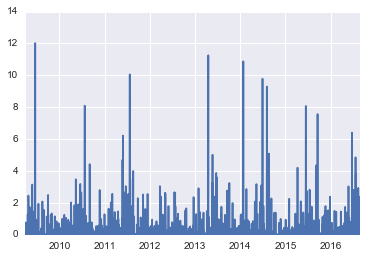

In [51]:
# Get daily precipitation through sum of values, plot daily precipitation
cso_rain_series = cso_rain_df['HOURLYPrecip'].resample('1D').sum()
cso_rain_series.plot()

In [52]:
cso_df['Date'] = cso_df.index.date
print(cso_df.dtypes)
cso_df.head()

Outfall Structure               object
Outfall Location                object
Tide Gate #                     object
Waterway Reach                  object
Plant                           object
Open date/time          datetime64[ns]
Close date/time                 object
Gate Open Period       timedelta64[ns]
Open Period Seconds            float64
Date                            object
dtype: object


,Outfall Structure,Outfall Location,Tide Gate #,Waterway Reach,Plant,Open date/time,Close date/time,Gate Open Period,Open Period Seconds,Date
2016-04-01 17:54:00,DS-N05,"Forest Glen Ave (S), West of Cicero",TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 17:54:00,2016-04-01 23:07:00,05:13:48,18828.0,2016-04-01
2016-04-01 17:53:00,DS-N08,Mango Ave ext. (Leonard & Miltmore) (W),TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 17:53:00,2016-04-01 19:42:00,01:48:55,6535.0,2016-04-01
2016-04-01 18:10:00,DS-N10B,Imlay St & Milwaukee (W),TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 18:10:00,2016-04-01 18:26:00,00:16:08,968.0,2016-04-01
2016-04-01 17:53:00,DS-N08,Mango Ave ext. (Leonard & Miltmore) (W),TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 17:53:00,2016-04-01 19:42:00,01:48:55,6535.0,2016-04-01
2016-04-01 17:54:00,DS-N05,"Forest Glen Ave (S), West of Cicero",TG1,NBCR Upper (NSC Confluence),Stickney,2016-04-01 17:54:00,2016-04-01 23:07:00,05:13:48,18828.0,2016-04-01


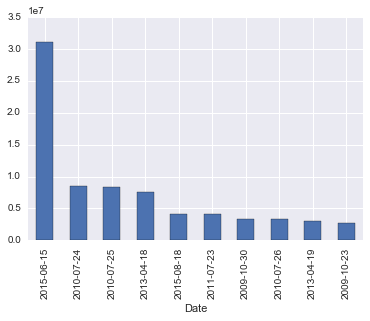

In [54]:
# Group CSO events by date, plot top 10
# Looking just for number of events, 
cso_by_date = cso_df.groupby(['Date'])['Open Period Seconds'].sum()
cso_date_sub = cso_by_date.sort_values(ascending=False)
cso_date_sub[:10].plot(kind='bar')

In [59]:
# June 15 of 2015 seems to have been the most severe CSO event, looking at what it consisted of
june_15_cso = cso_df['2015-06-15']
june_15_cso.head()

,Outfall Structure,Outfall Location,Tide Gate #,Waterway Reach,Plant,Open date/time,Close date/time,Gate Open Period,Open Period Seconds,Date
2015-06-15 09:38:00,CDS-51,CDS-51,NaN,Little Cal R (South),NaN,2015-06-15 09:38:00,2015-06-15 23:59:00,14:21:00,51660.0,2015-06-15
2015-06-15 15:35:00,CDS-2,CDS-2,NaN,Cal Sag Ch,NaN,2015-06-15 15:35:00,2015-06-15 23:59:00,08:24:00,30240.0,2015-06-15
2015-06-15 19:20:00,CDS-15-2,CDS-15-2,NaN,Little Cal R (North),NaN,2015-06-15 19:20:00,2015-06-15 23:59:00,04:39:00,16740.0,2015-06-15
2015-06-15 19:40:00,125TH ST PS (CDS-13),125TH ST PS (CDS-13),NaN,Little Cal R (North),NaN,2015-06-15 19:40:00,2015-06-15 23:59:00,04:19:00,15540.0,2015-06-15
2015-06-15 11:52:00,CDS-45,CDS-45,NaN,Little Cal R (South),NaN,2015-06-15 11:52:00,2015-06-15 23:59:00,12:07:00,43620.0,2015-06-15


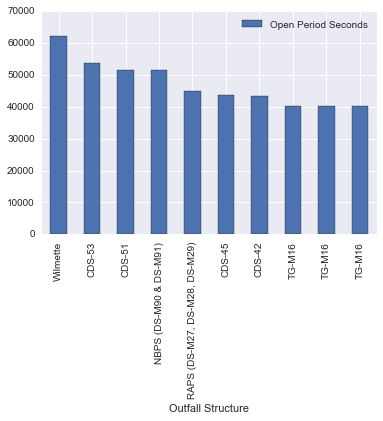

In [63]:
longest_june_15 = june_15_cso.sort_values(by='Open Period Seconds', ascending=False)
longest_june_15[:10].plot(kind='bar', x='Outfall Structure', y='Open Period Seconds')

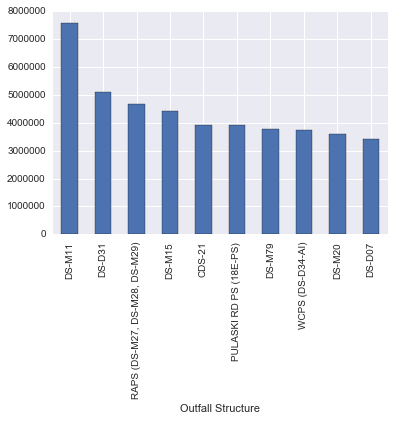

In [100]:
# Looking at Outfall Structures ranked by total length of CSOs
cso_by_structure = cso_df.groupby(['Outfall Structure'])['Open Period Seconds'].sum()
cso_by_structure = cso_by_structure.sort_values(ascending=False)
cso_by_structure[:10].plot(kind='bar')

In [84]:
# Merge top CSO days by length of open gates in CSOs with total precipitation on that day
cso_date_df = pd.DataFrame(cso_by_date).reset_index()
cso_date_df['Date'] = pd.to_datetime(cso_date_df['Date'])
cso_date_df = cso_date_df.set_index(pd.DatetimeIndex(cso_date_df['Date']))
cso_date_df['Precipitation'] = cso_rain_series
print(cso_date_df.shape)
print(cso_date_df.dtypes)
cso_date_df.head()

(429, 3)
Date                   datetime64[ns]
Open Period Seconds           float64
Precipitation                 float64
dtype: object


,Date,Open Period Seconds,Precipitation
2009-08-17,2009-08-17,39780.0,1.23
2009-08-18,2009-08-18,120.0,0.00
2009-08-19,2009-08-19,11820.0,0.56
2009-08-20,2009-08-20,9300.0,0.12
2009-08-21,2009-08-21,4260.0,0.21


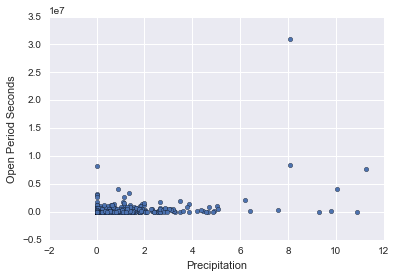

In [85]:
# Plotting all event open period length by precipitation, need to reduce to just top events
cso_date_df.plot(kind='scatter', x='Precipitation', y='Open Period Seconds')

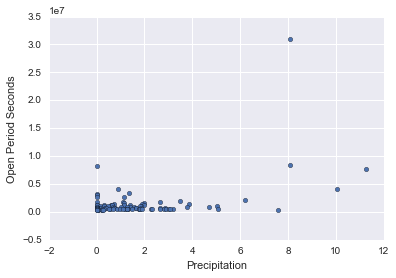

In [86]:
cso_date_df = cso_date_df.sort_values(by='Open Period Seconds', ascending=False)
# Plot top 100 CSO dates in terms of gate open period by precipitation on that date
cso_date_df[:100].plot(kind='scatter', x='Precipitation', y='Open Period Seconds')

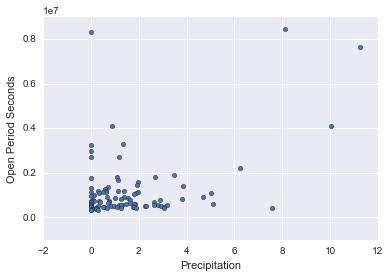

In [87]:
# Ignoring top event because skews the results significantly
cso_date_df[1:100].plot(kind='scatter', x='Precipitation', y='Open Period Seconds')

### Notes on CSOs and Rain 

Might be some relationship in CSOs on a given date and rainfall on that date, but it seems like relationship might be stronger given that they could be caused by rain accumulated over time.

#### Outlier Event

The top event was substantially more intense than all the others, so it makes sense to ignore it in some of the plots to get a clearer sense of the relationship

#### Additional Time Periods 

Plotting accumulated rain through rolling windows over a month and 2 weeks vs CSO length below

In [89]:
cso_rain_2wk = cso_rain_series.rolling(window=14).sum()

cso_date_2wk = pd.DataFrame(cso_by_date).reset_index()
cso_date_2wk['Date'] = pd.to_datetime(cso_date_2wk['Date'])
cso_date_2wk = cso_date_2wk.set_index(pd.DatetimeIndex(cso_date_2wk['Date']))
cso_date_2wk['TwoWeekPrecip'] = cso_rain_2wk

print(cso_date_2wk.shape)
print(cso_date_2wk.dtypes)
cso_date_2wk.head()

(429, 3)
Date                   datetime64[ns]
Open Period Seconds           float64
TwoWeekPrecip                 float64
dtype: object


,Date,Open Period Seconds,TwoWeekPrecip
2009-08-17,2009-08-17,39780.0,4.11
2009-08-18,2009-08-18,120.0,4.11
2009-08-19,2009-08-19,11820.0,4.67
2009-08-20,2009-08-20,9300.0,4.79
2009-08-21,2009-08-21,4260.0,4.58


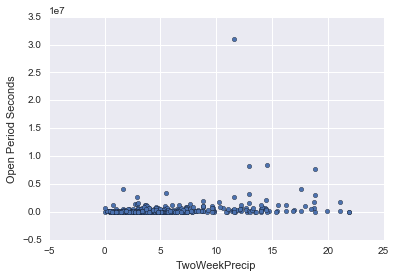

In [90]:
cso_date_2wk.plot(kind='scatter', x='TwoWeekPrecip', y='Open Period Seconds')

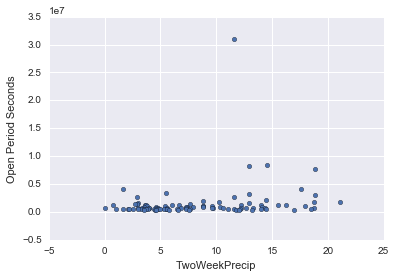

In [91]:
cso_date_2wk = cso_date_2wk.sort_values(by='Open Period Seconds', ascending=False)
# Plot top 100 CSO dates in terms of gate open period by accumulated 2 week precipitation at that date
cso_date_2wk[:100].plot(kind='scatter', x='TwoWeekPrecip', y='Open Period Seconds')

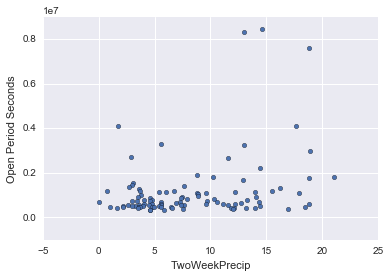

In [92]:
# Ignore outlier
cso_date_2wk[1:100].plot(kind='scatter', x='TwoWeekPrecip', y='Open Period Seconds')

In [93]:
# May be more of a relationship in the two week window, moving to a month
cso_rain_month = cso_rain_series.rolling(window=30).sum()

cso_date_month = pd.DataFrame(cso_by_date).reset_index()
cso_date_month['Date'] = pd.to_datetime(cso_date_month['Date'])
cso_date_month = cso_date_month.set_index(pd.DatetimeIndex(cso_date_month['Date']))
cso_date_month['MonthPrecip'] = cso_rain_month

print(cso_date_month.shape)
print(cso_date_month.dtypes)
cso_date_month.head()

(429, 3)
Date                   datetime64[ns]
Open Period Seconds           float64
MonthPrecip                   float64
dtype: object


,Date,Open Period Seconds,MonthPrecip
2009-08-17,2009-08-17,39780.0,4.54
2009-08-18,2009-08-18,120.0,4.54
2009-08-19,2009-08-19,11820.0,5.10
2009-08-20,2009-08-20,9300.0,5.18
2009-08-21,2009-08-21,4260.0,5.39


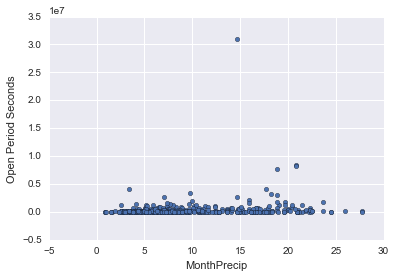

In [94]:
cso_date_month.plot(kind='scatter', x='MonthPrecip', y='Open Period Seconds')

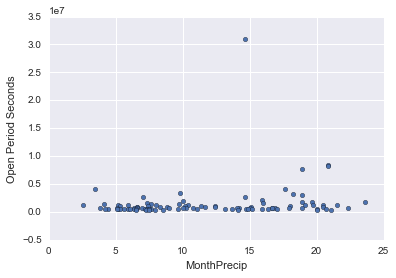

In [95]:
cso_date_month = cso_date_month.sort_values(by='Open Period Seconds', ascending=False)
# Plot top 100 CSO dates in terms of gate open period by accumulated monthly precipitation at that date
cso_date_month[:100].plot(kind='scatter', x='MonthPrecip', y='Open Period Seconds')

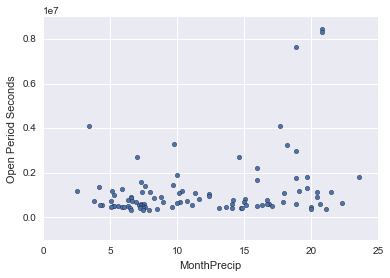

In [96]:
# Outlier removed
cso_date_month[1:100].plot(kind='scatter', x='MonthPrecip', y='Open Period Seconds')

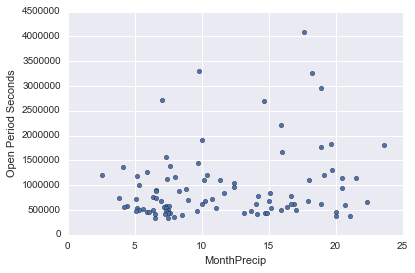

In [99]:
# Multiple outliers factor in here, see what plot looks like without top 5
cso_date_month[5:100].plot(kind='scatter', x='MonthPrecip', y='Open Period Seconds')

## Notes from Initial Pass

* Just from looking at the plots after ignoring the main outlier event, and additionally when ignoring some additional events, it may be worth looking more into details of some of the extreme events, and other ways of relating precipitation and events
* While it's important to take accumulated rainfall into account, daily precipitation will still need to be factored in, because even if the month has been heavy, if there are multiple events in one heavy period they still may not be the same, could be worsened by a downpour on a given day